<a href="https://colab.research.google.com/github/wahyunh10/Project-Bike-Sales-in-Europe/blob/main/Project_Bike_Sales_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sales Dataset**

**Introduction**

Let's Explore bike store sales in europe. All of the data can be downloaded directly via kaggle.

The data itself has the LIMITATION that all the transaction did not include the user id. So, the assumption is all the transaction is unique for each user.

**Data Preprocessing**

Import the csv file as panda DataFrames and examine it.

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#Import the excel file and examine it
df = pd.read_csv('Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df.shape

(113036, 18)

**Cleaning the Dataset:** 

Dealing with missing values, correct and create necessary date data types, and drop the duplicate.

In [5]:
#Investigate missing value
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [6]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [7]:
#correct and create necessary date data types
df['Date'] = pd.to_datetime(df['Date'])
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Day_of_Weekend'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name().str[:3]

In [8]:
#Investigate the duplicate
df.duplicated().sum()

1000

In [9]:
#drop the duplicate
df.drop_duplicates(inplace = True)
print(df.shape)

(112036, 21)


In [10]:
#final DataFrame
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,month_year,Day_of_Weekend,Month_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-11,Tuesday,Nov
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11,Thursday,Nov
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-03,Sunday,Mar
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-03,Wednesday,Mar
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-05,Thursday,May


**Exploratory Analysis**

Exploratory data analysis is a way to better understand our data which helps in further Data preprocessing. And data visualization is a key, making the exploratory data analysis process streamline and easily analyzing data using plots and charts. First, describe numerical columns in descriptive stastic.

In [11]:
df[['Year','Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']].describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# **Sales Analysis**
**Sales Based On Country**

In [12]:
Country_Sales = df.groupby(['Country']).agg({'Revenue':'sum', 'Order_Quantity':'sum'}).sort_values('Revenue', ascending=False)
Country_Sales

,Revenue,Order_Quantity
Country,,
United States,27777098,473880
Australia,21196395,261227
United Kingdom,10575628,155769
Germany,8956724,124755
France,8414745,127872
Canada,7906182,190202


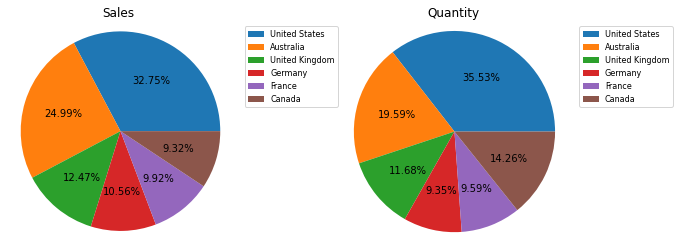

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 5 else ''

p,t,a = ax1.pie(Country_Sales.Revenue, autopct=autopct)
p,t,a = ax2.pie(Country_Sales.Order_Quantity, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes = Country_Sales.Revenue/Country_Sales.Revenue.sum()*100
normsizes2 = Country_Sales.Order_Quantity/Country_Sales.Order_Quantity.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Country_Sales.index.values,normsizes.values) if i > 5])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Country_Sales.index.values,normsizes2.values) if i > 5])

ax1.set_title('Sales')
ax2.set_title('Quantity')

ax1.legend(h, l,loc="best", bbox_to_anchor=(1.5,1), fontsize=8)
ax2.legend(h, j,loc="best", bbox_to_anchor=(1.5,1), fontsize=8)
plt.subplots_adjust(wspace = 0.5)

plt.show()


From the previous charts, we know. There are Top 3 Countries by Total Sales from 2011-2016, They are US, Australia and UK. But from the perspective of Total Quantities, the 3rd of Top 3 is Canada, while the top 2 remains held by the US and Australia and the UK dropped to the fourth. Now let's explore, where is the best foreign transaction for online retail.

**Sales Growth**

Next, let's explore the growth of sales for the 6 years.

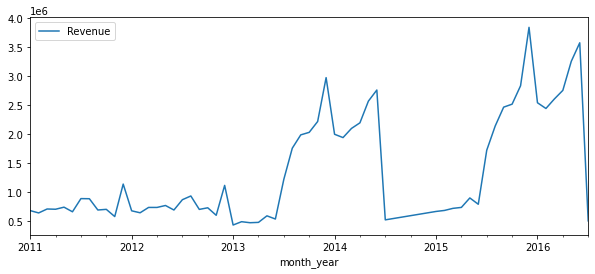

In [14]:
Sales_Gr = pd.DataFrame(df.groupby(['month_year']).agg({'Revenue':'sum'})).reset_index()
Sales_Gr.plot(x='month_year', figsize=(10,4));

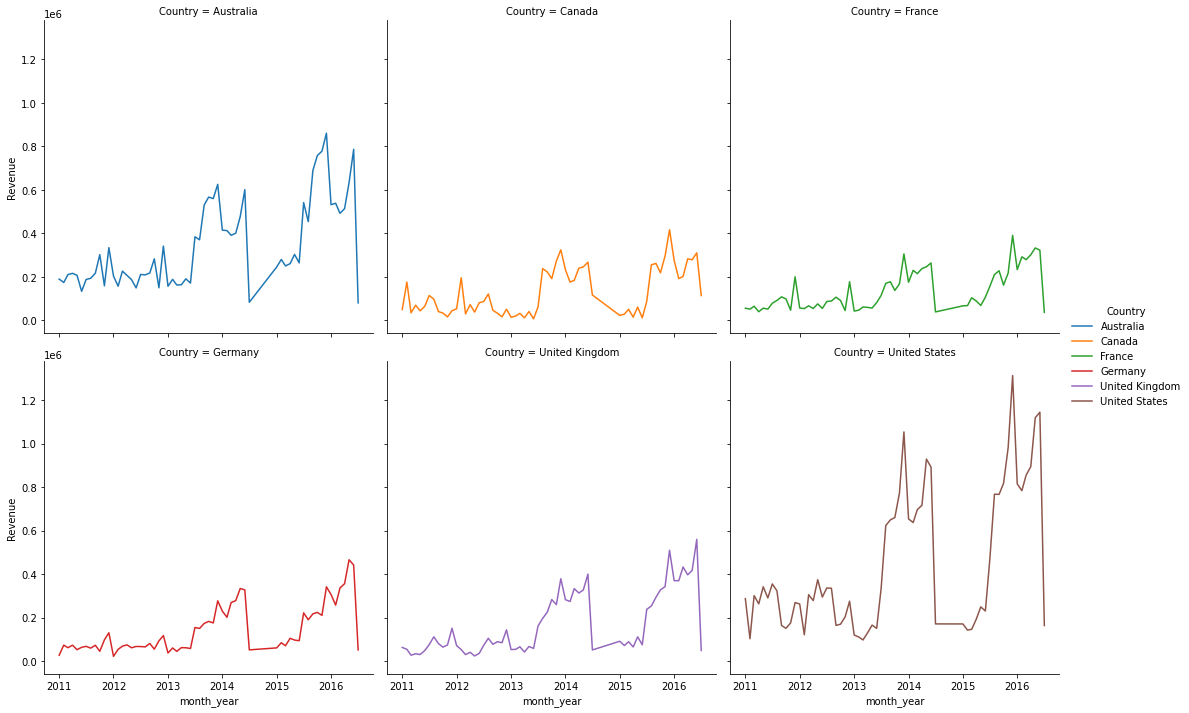

In [15]:
Sales_Gr_Country2 = df.groupby(['Country', 'month_year']).agg({'Revenue':'sum'}).reset_index().astype({'Revenue':'float'})
Sales_Gr_Country2['month_year'] = Sales_Gr_Country2['month_year'].astype(str)
Sales_Gr_Country2['month_year'] = pd.to_datetime(Sales_Gr_Country2['month_year'])
sns.relplot(x="month_year", y="Revenue", hue="Country", col='Country', col_wrap=3, kind='line', data=Sales_Gr_Country2);

Mid of 2013 to Mid of 2014 and Mid of 2015 to Mid 2016 are the highest growth of the sales. All of the countries recorded the peakest sales during these periods. But the largest transactions during these periods are from the US.

**Sales by Category**

In [16]:
Sales_Category = df.groupby(['Product_Category', 'Year']).agg({'Revenue':'sum', 'Order_Quantity':'sum', 'Profit':'sum'}).reset_index()
Sales_Category['Year']= Sales_Category['Year'].astype('category')
Sales_Category

,Product_Category,Year,Revenue,Order_Quantity,Profit
0,Accessories,2013,3361765,228560,1972308
1,Accessories,2014,4267159,300343,2500054
2,Accessories,2015,3265581,222278,1915863
3,Accessories,2016,4128261,291610,2418969
4,Bikes,2011,8951966,5254,2877185
5,Bikes,2012,9133795,5328,2938519
6,Bikes,2013,9758574,5650,3256562
7,Bikes,2014,7525417,4552,2561401
8,Bikes,2015,14742208,8520,4919518
9,Bikes,2016,11322524,6897,3846541


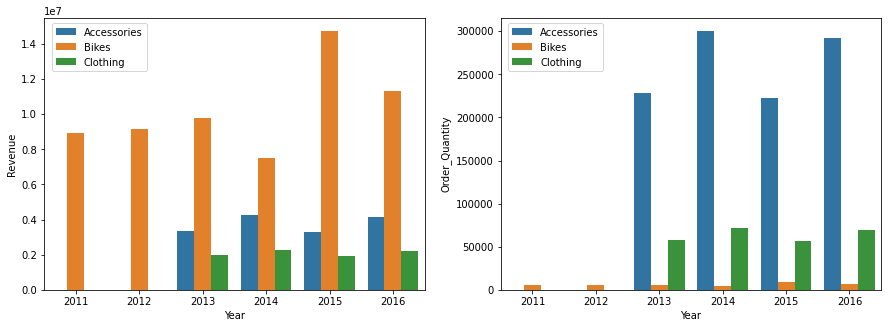

In [17]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x="Year", y="Revenue", hue="Product_Category", data=Sales_Category, ax=axes[0])
sns.barplot(x="Year", y="Order_Quantity", hue="Product_Category", data=Sales_Category, ax=axes[1])
axes[0].legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0)
axes[1].legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()

It's wonderful to know how the dynamic growth of the sales from each category. From above graphs we know, 2015 is the highest peak of Bike Sales and 2016 is the highest sales of Accessories category, although the number of sales almost being equal to its 2014. We also already discover if Acessories and Clothes categories just went on sale at 2013.

From the total quantities, we know Acessories category is the largest.

Now let's warp it all to know the percentage of each categories from their total during all of periods Both in Sales, Profit and Quantities.

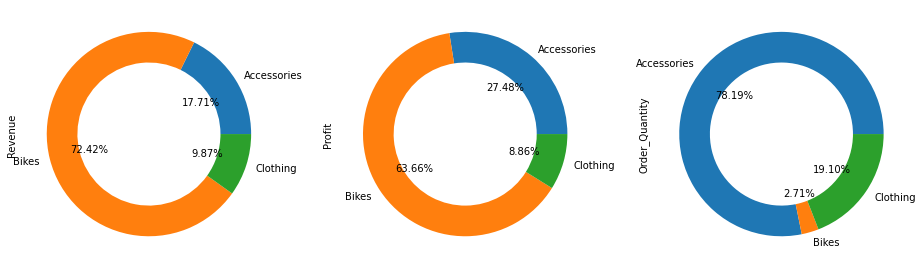

In [18]:
Sales_Category_Revenue = Sales_Category.groupby('Product_Category').agg({'Revenue':'sum','Profit':'sum', 'Order_Quantity':'sum'})
Sales_Category_Revenue.plot(kind='pie', wedgeprops=dict(width=.3), subplots=True, figsize=(13,13), autopct='%1.2f%%', legend=False, labels=Sales_Category_Revenue.index)
plt.tight_layout()
plt.show();

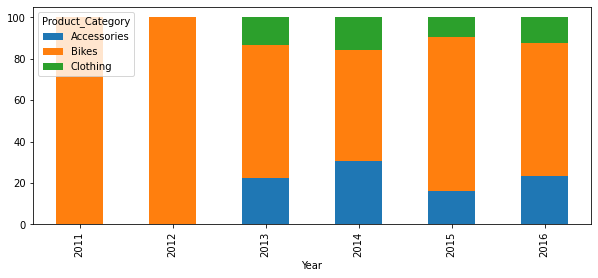

In [19]:
Sales_Category_Gr = Sales_Category.pivot(index='Year', values='Revenue', columns='Product_Category').fillna(0)
Sales_Category_Pct =  Sales_Category_Gr.apply(lambda x: x/sum(x)*100, axis=1).round(2)

ax= Sales_Category_Pct.plot(kind='bar', stacked=True, figsize=(10,4))

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
plt.show()

Although the propotion of Bikes in quantity is the smalest one, but its sales and profit is the highest one since it become the core of business. But when the sales of core business decline just like happened during 2014, Accessories and Clothing could be complementary items to support business. We know accessories and clothing are still growing when the sales of bikes decline in 2014.

**Sales by Sub - Category**

In [20]:
Sales_Sub_Category = df.groupby(['Product_Category', 'Sub_Category']).agg({'Revenue':'sum', 'Order_Quantity':'sum'}).reset_index().astype({'Sub_Category':'category'})
Sales_Sub_Category

,Product_Category,Sub_Category,Revenue,Order_Quantity
0,Accessories,Bike Racks,517800,4741
1,Accessories,Bike Stands,342830,2403
2,Accessories,Bottles and Cages,1390570,238610
3,Accessories,Cleaners,198821,27574
4,Accessories,Fenders,1245733,62138
5,Accessories,Helmets,5738482,181522
6,Accessories,Hydration Packs,990406,19914
7,Accessories,Tires and Tubes,4598124,505889
8,Bikes,Mountain Bikes,21020794,11935
9,Bikes,Road Bikes,33150708,19638


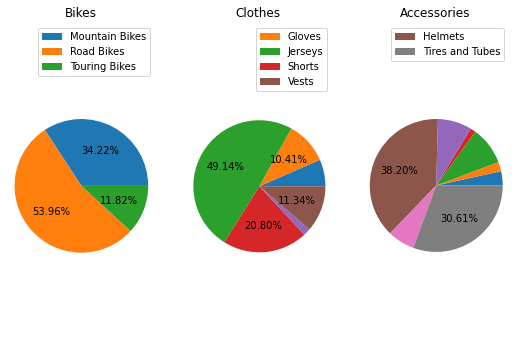

In [21]:
Category_Acc = Sales_Sub_Category[Sales_Sub_Category['Product_Category']=='Accessories']
Category_Bik = Sales_Sub_Category[Sales_Sub_Category['Product_Category']=='Bikes']
Category_Clt = Sales_Sub_Category[Sales_Sub_Category['Product_Category']=='Clothing']
f, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 10 else ''

p,t,a = ax2.pie(Category_Bik.Revenue, autopct=autopct)
p,t,a = ax3.pie(Category_Clt.Revenue, autopct=autopct)
p,t,a = ax4.pie(Category_Acc.Revenue, autopct=autopct)

ax2.axis('equal')
ax3.axis('equal')
ax4.axis('equal')
# normalize dataframe (not actually needed here, but for general case)
normsizes2 = Category_Bik.Revenue/Category_Bik.Revenue.sum()*100
normsizes3 = Category_Clt.Revenue/Category_Clt.Revenue.sum()*100
normsizes4 = Category_Acc.Revenue/Category_Acc.Revenue.sum()*100

# create handles and labels for legend, take only those where value is > 1

h,j = zip(*[(h,lab) for h,lab,i in zip(p,Category_Bik.Sub_Category.values,normsizes2.values) if i > 10])
m,k = zip(*[(m,lab) for m,lab,i in zip(p,Category_Clt.Sub_Category.values,normsizes3.values) if i > 10])
n,l = zip(*[(n,lab) for n,lab,i in zip(p,Category_Acc.Sub_Category.values,normsizes4.values) if i > 10])
ax2.set_title('Bikes')
ax3.set_title('Clothes')
ax4.set_title('Accessories')
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(m, k,loc="best", bbox_to_anchor=(1,1))
ax4.legend(n, l,loc="best", bbox_to_anchor=(1,1))
plt.show()

Now we discover sub category which generates a lot of sales in each category. From the bikes, people tend to buy more the road bikes. Jersey sub-category is the most choseen by people, and both helmets and Tires and Tubes are the top 2 of acessories category.

**Top Sales by Products**

Let's see deeper to know what are the top product in each category.

In [22]:
Sales_Product = df.groupby(['Product_Category', 'Product']).agg({'Revenue':'sum', 'Order_Quantity':'sum'}).reset_index()
Sales_Product.head(10)

,Product_Category,Product,Revenue,Order_Quantity
0,Accessories,AWC Logo Cap,459,52
1,Accessories,All-Purpose Bike Stand,341419,2391
2,Accessories,Bike Wash - Dissolver,198745,27579
3,Accessories,Fender Set - Mountain,1245350,62081
4,Accessories,HL Mountain Tire,875036,27091
5,Accessories,HL Road Tire,449915,15412
6,Accessories,Hitch Rack - 4-Bike,519211,4753
7,Accessories,Hydration Pack - 70 oz.,988690,19857
8,Accessories,LL Mountain Tire,283013,12666
9,Accessories,LL Road Tire,488855,26245


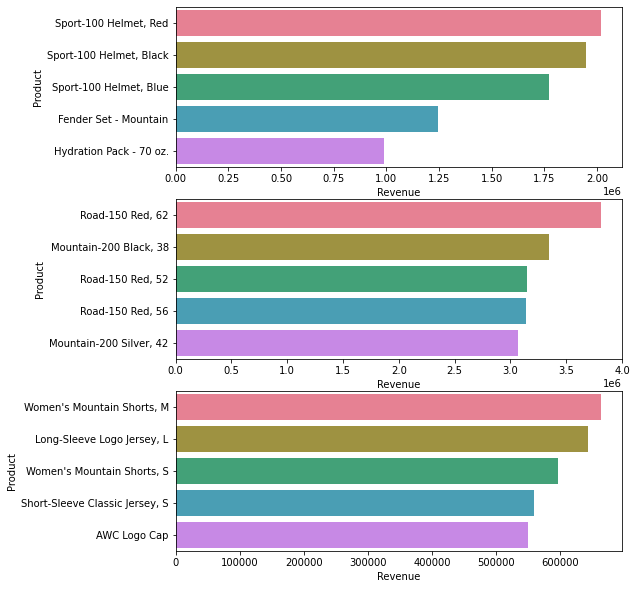

In [23]:
Product_Acc = Sales_Product[Sales_Product['Product_Category']=='Accessories'].sort_values('Revenue', ascending=False)[0:5]
Product_Bik = Sales_Product[Sales_Product['Product_Category']=='Bikes'].sort_values('Revenue', ascending=False)[0:5]
Product_Clt = Sales_Product[Sales_Product['Product_Category']=='Clothing'].sort_values('Revenue', ascending=False)[0:5]

fig, axes = plt.subplots(3,figsize=(8, 10))
sns.barplot(x='Revenue', y=Product_Acc.Product, data = Product_Acc,
            label="Accessories", ax=axes[0], palette='husl')
sns.barplot(x='Revenue', y=Product_Bik.Product, data = Product_Bik,
            label="Bike", ax=axes[1], palette='husl')
sns.barplot(x='Revenue', y=Product_Clt.Product, data = Product_Clt,
            label="Clothes", ax=axes[2], palette='husl')
plt.show()

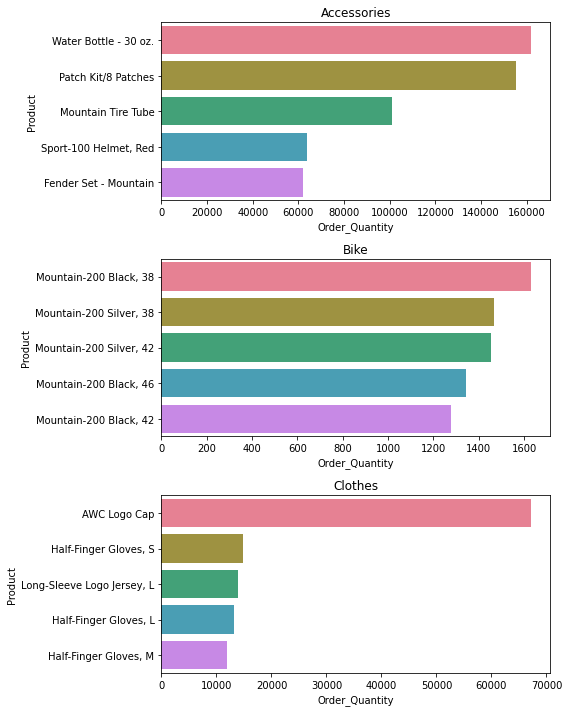

In [24]:
Quantity_Product = df.groupby(['Product_Category', 'Product']).agg({'Order_Quantity':'sum'}).reset_index()
QuantProd_Acc = Quantity_Product[Quantity_Product['Product_Category']=='Accessories'].sort_values('Order_Quantity', ascending=False)[0:5]
QuantProd_Bik = Quantity_Product[Quantity_Product['Product_Category']=='Bikes'].sort_values('Order_Quantity', ascending=False)[0:5]
QuantProd_Clt = Quantity_Product[Quantity_Product['Product_Category']=='Clothing'].sort_values('Order_Quantity', ascending=False)[0:5]

fig, axes = plt.subplots(3,figsize=(8, 10))
sns.barplot(x='Order_Quantity', y=QuantProd_Acc.Product, data = QuantProd_Acc,
            ax=axes[0], palette='husl').set_title('Accessories')
sns.barplot(x='Order_Quantity', y=QuantProd_Bik.Product, data = QuantProd_Bik,
            ax=axes[1], palette='husl').set_title('Bike')
sns.barplot(x='Order_Quantity', y=QuantProd_Clt.Product, data = QuantProd_Clt,
           ax=axes[2], palette='husl').set_title('Clothes')
plt.tight_layout()
plt.show()

**Highest and Lowest Month of Sales**

Now time to answer what is the month that people tend to buy more or the month that generated the highest and the lowest sales?

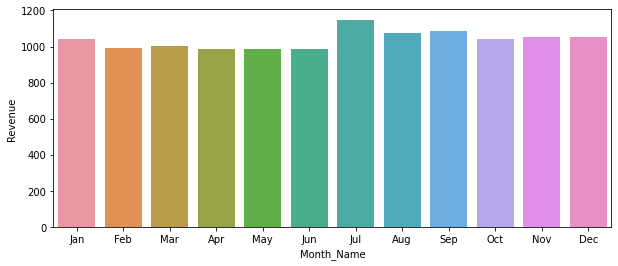

In [25]:
Monthly_Sales = df.groupby(['Month_Name','Product_Category']).agg({'Revenue':'mean', 'Order_Quantity':'mean'}).reset_index()
Monthly_Sales = Monthly_Sales.set_index('Month_Name')
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_Sales.index = pd.CategoricalIndex(Monthly_Sales.index, categories=months_ordered, ordered=True)
Monthly_Sales = Monthly_Sales.sort_index().reset_index()

fig, axes = plt.subplots(figsize=(10,4))
sns.barplot(x="Month_Name", y= 'Revenue', ci=None,
                data=Monthly_Sales)

plt.show()

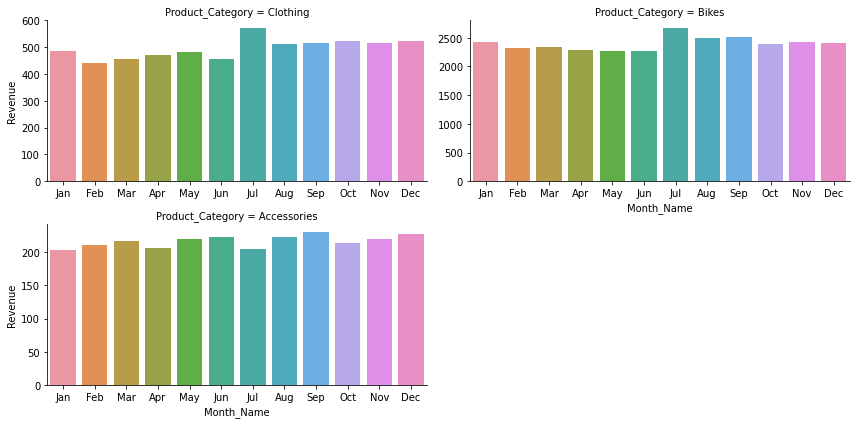

In [26]:
sns.catplot(x='Month_Name', y= 'Revenue', col="Product_Category", col_wrap=2,
                data=Monthly_Sales, sharey=False, sharex=False, height=3, aspect=2,
                kind="bar")

plt.show()

**Highest Sales of Day**

Then, what is the day when people tend to buy more or the day that generated the highest and the lowest sales?

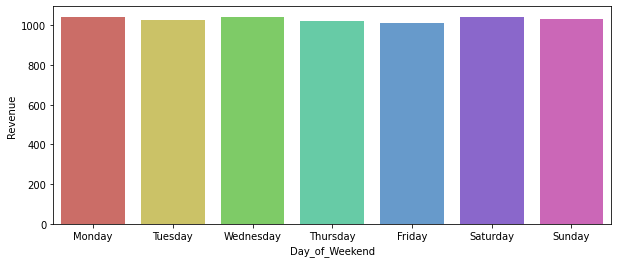

In [27]:
Day_Sales = df.groupby(['Day_of_Weekend','Product_Category']).agg({'Revenue':'mean'}).reset_index()
Day_Sales = Day_Sales.set_index('Day_of_Weekend')
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Day_Sales.index = pd.CategoricalIndex(Day_Sales.index, categories=day_ordered, ordered=True)
Day_Sales = Day_Sales.sort_index().reset_index()

fig, axes = plt.subplots(figsize=(10,4))
sns.barplot(x="Day_of_Weekend", y= 'Revenue', ci=None,
                data=Day_Sales, palette='hls', ax=axes)

plt.show()

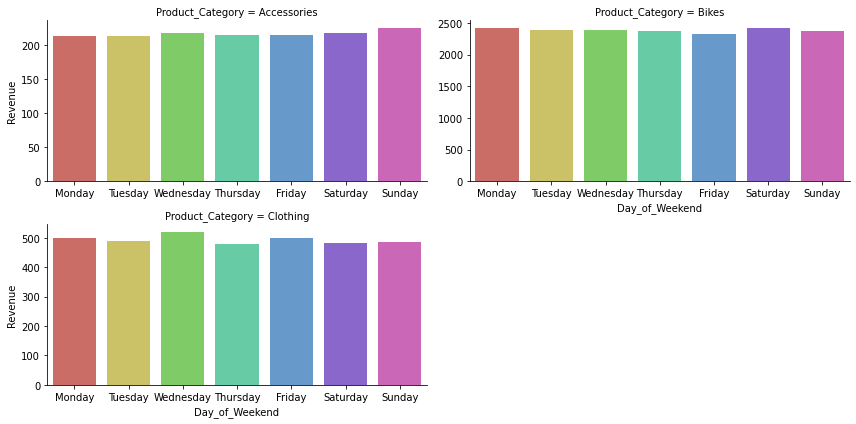

In [28]:
sns.catplot(x='Day_of_Weekend', y= 'Revenue', col="Product_Category", col_wrap=2,
                data=Day_Sales, sharey=False, sharex=False, palette='hls',
                kind="bar", height=3, aspect=2)

plt.show()

# **Customer Analysis**
**Age**

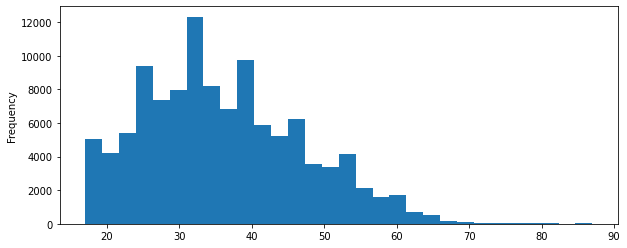

In [29]:
df.Customer_Age.plot(kind='hist', bins=30, figsize=(10,4));

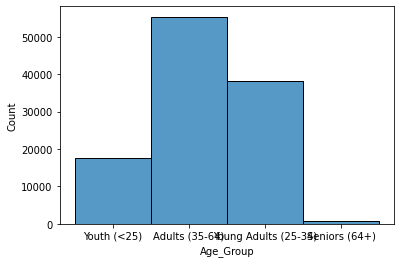

In [30]:
sns.histplot(data=df, x='Age_Group')
sns.set(rc={'figure.figsize':(8,4)});

Majority of customers are around 25s, 30s, and 40s. The most of customers are coming from Adults Group.

Now, It's time to answer some business questions related to age and age group.

**Which the Age that provides the most Revenue and Profit?**

In [31]:
Age_Sales = df.groupby(['Customer_Age']).agg({'Revenue':'sum', 'Profit':'sum'}).sort_values(['Revenue','Profit'], ascending=False)[0:10]
Age_Sales

,Revenue,Profit
Customer_Age,,
28,4046719,1462787
29,3700512,1373801
34,3463573,1278917
31,3365566,1256404
35,3228932,1157905
32,2880177,1093287
38,2842189,1076579
39,2839847,1065081
27,2813490,1013649


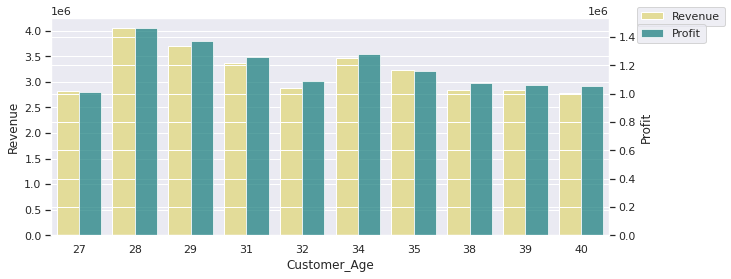

In [32]:
col1 = 'khaki'
col2 = 'darkcyan'

plt.figure(figsize=(10, 4))
ax = sns.barplot(x=Age_Sales.index, y=Age_Sales.Revenue, data=Age_Sales, label='Revenue', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0)

ax2 = ax.twinx()
sns.barplot(x =Age_Sales.index, y =Age_Sales.Profit, data=Age_Sales, alpha=0.7, color = col2, label = 'Profit', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.05, 0.97), loc='upper left', borderaxespad=0)
plt.show()

**Which the Age Group that generate the most Revenue and Profit?**

In [33]:
AgeGroup_Sales = df.groupby(['Age_Group']).agg({'Revenue':'sum', 'Profit':'sum'}).sort_values(['Revenue','Profit'], ascending=False)
AgeGroup_Sales

,Revenue,Profit
Age_Group,,
Adults (35-64),42367181,16234940
Young Adults (25-34),30467032,11314684
Youth (<25),11685489,4359006
Seniors (64+),307070,137609


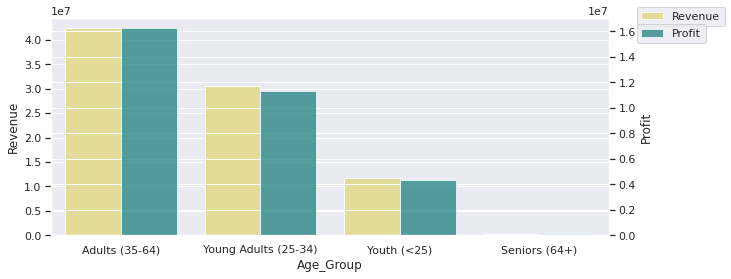

In [34]:
col1 = 'khaki'
col2 = 'darkcyan'

plt.figure(figsize=(10,4))
ax = sns.barplot(x=AgeGroup_Sales.index, y=AgeGroup_Sales.Revenue, data=AgeGroup_Sales, label='Revenue', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0)

ax2 = ax.twinx()
sns.barplot(x =AgeGroup_Sales.index, y =AgeGroup_Sales.Profit, data=AgeGroup_Sales, alpha=0.7, color = col2, label = 'Profit', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.05, 0.97), loc='upper left', borderaxespad=0)
plt.show()

**What is the Percentage of Revenue and Profit Based on Age Group?**

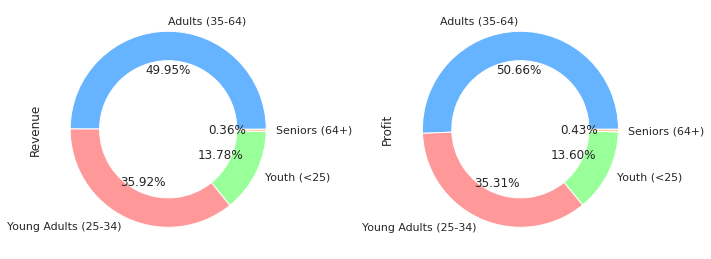

In [35]:
AgeGroup_Sales.plot(kind='pie', subplots=True, wedgeprops=dict(width=.3), colors = ['#66b3ff', '#ff9999', '#99ff99','#ffcc99'], figsize=(10,10), autopct='%1.2f%%', legend=False, labels=AgeGroup_Sales.index)
plt.tight_layout()
plt.show();

**Gender**

The distibution of Customer based on Gender.

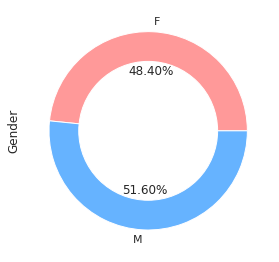

In [36]:
df.Customer_Gender.str.get_dummies().sum().plot.pie(label='Gender',colors = ['#ff9999','#66b3ff'], autopct='%1.2f%%', figsize=(4,4))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

**Which the Gender that provides the most Revenue and Profit?**

In [37]:
Gender_Sales = df.groupby(['Customer_Gender']).agg({'Revenue':'sum', 'Profit':'sum'}).sort_values(['Revenue','Profit'], ascending=False)
Gender_Sales

,Revenue,Profit
Customer_Gender,,
M,43132083,16404420
F,41694689,15641819


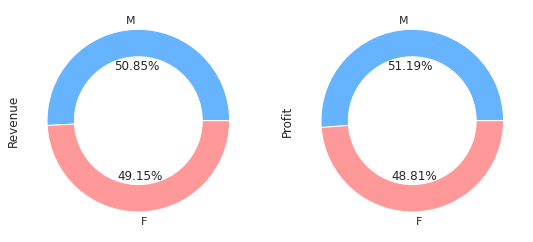

In [39]:
Gender_Sales.plot(kind='pie', subplots=True, wedgeprops=dict(width=.3), colors = ['#66b3ff', '#ff9999'], figsize=(9,9), autopct='%1.2f%%', legend=False, labels=Gender_Sales.index);

**Correlation Between Variables**

In [40]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,month_year,Day_of_Weekend,Month_Name
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-11,Tuesday,Nov
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11,Thursday,Nov
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-03,Sunday,Mar
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-03,Wednesday,Mar
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-05,Thursday,May


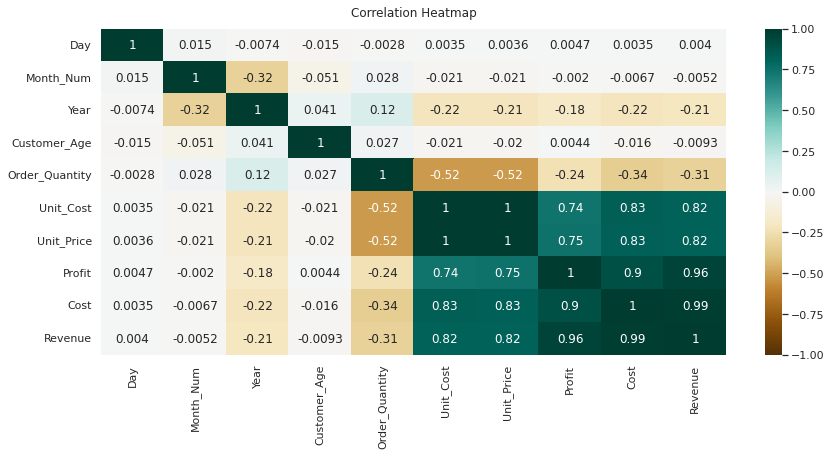

In [41]:
df['Month_Num'] = pd.to_datetime(df['Date']).dt.month
dataframe=df[['Day','Month_Num','Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']]

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# **Correlation Between Cost and Profit**
**Linear Regression**

In [42]:
import scipy.stats

x = df['Cost']
y = df['Profit']


result = scipy.stats.linregress(x, y)
result

LinregressResult(slope=0.4626152393900728, intercept=68.09561293753225, rvalue=0.9021088698068597, pvalue=0.0, stderr=0.0006611125748410092)

Interpretation:

pvalue=0.0 < 𝛼 = 0.05. This means that there is a strong evidence of a linear association between the variables 'Cost' and 'Profit'

rvalue=0.9021088698068601. 0.9021 means that 90% of the variation in the variable 'Profit' is explained by the variable 'Cost'

slope=0.462615239390073 means, If the Cost increases by 1 dollar, then the model predicts that the Profil will also crease by approximately 0.46 dollar

Spearman’s Correlation
Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables. For the case of test above, we still haven't done the normality test. Further, if the two variables being considered not normal. it may have a non-Gaussian distribution.

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

In [43]:
#import libraries and conduct the test
#normality test using shapiro test
from scipy.stats import shapiro
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)


In [44]:
stat, p = shapiro(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.615, p=0.000
Sample does not look Gaussian (reject H0)


In [45]:
#import libraries and conduct the test
from scipy.stats import spearmanr
corrs = spearmanr(x, y)
print(corrs)

SpearmanrResult(correlation=0.8940387040256325, pvalue=0.0)


From the output we can see that the Spearman rank correlation is 0.8940387040256325 and the corresponding p-value is 0.0. This indicates that there is a positive correlation between the Cost and Profit arond 89.4%. The p-value of the correlation is less than 0.05, the correlation is statistically significant. This result is in accordance with the regression result